# **Support Vector Machine(SVM) Assignment**

# **Assignment 17(b)**

# ***2.SalaryData DataSet(SalaryData_Test , SalaryData_Train)***

# **Importing Libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Importing DataSet**

**Importing TrainData**

In [2]:
#importing training data
df_train=pd.read_csv('/content/SalaryData_Train(1).csv')
df_train

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

**Importing TestData**

In [3]:
#importing test data
df_test=pd.read_csv('/content/SalaryData_Test(1).csv')
df_test

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

# **Exploratory Data Analysis**

# ***Checking for training data***

In [4]:
#train data
df_train.shape

(30161, 14)

In [5]:
df_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [6]:
df_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [7]:
#checking missing values
(df_train.isna().sum())/len(df_train)*100

age              0.0
workclass        0.0
education        0.0
educationno      0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
capitalgain      0.0
capitalloss      0.0
hoursperweek     0.0
native           0.0
Salary           0.0
dtype: float64

In [8]:
df_train.isna().any()

age              False
workclass        False
education        False
educationno      False
maritalstatus    False
occupation       False
relationship     False
race             False
sex              False
capitalgain      False
capitalloss      False
hoursperweek     False
native           False
Salary           False
dtype: bool

In [9]:
#checking duplicates
df_train.duplicated().sum()

3258

In [10]:
df_train[df_train.duplicated()].shape

(3258, 14)

In [11]:
df_train.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


# ***Checking for testing data***

In [13]:
#test data
df_test.shape

(15060, 14)

In [14]:
df_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [15]:
df_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [16]:
#checking missing values
(df_test.isna().sum())/len(df_test)*100

age              0.0
workclass        0.0
education        0.0
educationno      0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
capitalgain      0.0
capitalloss      0.0
hoursperweek     0.0
native           0.0
Salary           0.0
dtype: float64

In [17]:
df_test.isna().any()

age              False
workclass        False
education        False
educationno      False
maritalstatus    False
occupation       False
relationship     False
race             False
sex              False
capitalgain      False
capitalloss      False
hoursperweek     False
native           False
Salary           False
dtype: bool

In [18]:
#checking duplicates
df_test.duplicated().sum()

930

In [19]:
df_test[df_test.duplicated()]

age workclass      education  educationno        maritalstatus  \
551     59   Private        HS-grad            9             Divorced   
601     32   Private        HS-grad            9   Married-civ-spouse   
681     40   Private        HS-grad            9   Married-civ-spouse   
799     24   Private      Bachelors           13        Never-married   
1044    44   Private    Prof-school           15   Married-civ-spouse   
...    ...       ...            ...          ...                  ...   
15043   51   Private        HS-grad            9   Married-civ-spouse   
15044   22   Private   Some-college           10        Never-married   
15049   32   Private        HS-grad            9   Married-civ-spouse   
15052   31   Private        HS-grad            9   Married-civ-spouse   
15053   25   Private        HS-grad            9        Never-married   

               occupation    relationship    race      sex  capitalgain  \
551         Other-service   Not-in-family   White   Female            0   
601                 Sales         Husband   White     Male            0   
681          Craft-repair         Husband   White     Male            0   
799        Prof-specialty   Not-in-family   White     Male            0   
1044       Prof-specialty         Husband   White     Male        99999   
...                   ...             ...     ...      ...          ...   
15043        Craft-repair         Husband   White     Male            0   
15044        Craft-repair       Own-child   White     Male            0   
15049   Handlers-cleaners         Husband   White     Male            0   
15052        Craft-repair         Husband   White     Male            0   
15053       Other-service       Own-child   White   Female            0   

       capitalloss  hoursperweek          native  Salary  
551              0            40   United-States   <=50K  
601              0            40   United-States   <=50K  
681              0            40   United-States   <=50K  
799              0            35   United-States   <=50K  
1044             0            60   United-States    >50K  
...            ...           ...             ...     ...  
15043            0            40   United-States   <=50K  
15044            0            40   United-States   <=50K  
15049            0            40   United-States   <=50K  
15052            0            40   United-States   <=50K  
15053            0            40   United-States   <=50K  

[930 rows x 14 columns]

In [20]:
df_test.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  15060.000000  15060.000000  15060.000000  15060.000000  15060.000000
mean      38.768327     10.112749   1120.301594     89.041899     40.951594
std       13.380676      2.558727   7703.181842    406.283245     12.062831
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       48.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   3770.000000     99.000000

In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [22]:
#checking dependent features class
#for training data
df_train['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [23]:
df_train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [24]:
#for testing data
df_test['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [25]:
df_test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [26]:
pd.crosstab(df_train['occupation'],df_train['Salary'])

Salary               <=50K   >50K
occupation                       
 Adm-clerical         3223    498
 Armed-Forces            8      1
 Craft-repair         3122    908
 Exec-managerial      2055   1937
 Farming-fishing       874    115
 Handlers-cleaners    1267     83
 Machine-op-inspct    1720    245
 Other-service        3080    132
 Priv-house-serv       142      1
 Prof-specialty       2227   1811
 Protective-serv       434    210
 Sales                2614    970
 Tech-support          634    278
 Transport-moving     1253    319

In [27]:
pd.crosstab(df_train['workclass'],df_train['Salary'])

Salary              <=50K   >50K
workclass                       
 Federal-gov          578    365
 Local-gov           1458    609
 Private            17409   4876
 Self-emp-inc         474    600
 Self-emp-not-inc    1785    714
 State-gov            935    344
 Without-pay           14      0

In [28]:
pd.crosstab(df_train['occupation'],df_train['workclass'])

workclass            Federal-gov   Local-gov   Private   Self-emp-inc  \
occupation                                                              
 Adm-clerical                316         281      2793             28   
 Armed-Forces                  9           0         0              0   
 Craft-repair                 63         143      3146             99   
 Exec-managerial             179         212      2647            385   
 Farming-fishing               8          29       450             51   
 Handlers-cleaners            22          46      1255              2   
 Machine-op-inspct            14          11      1881             10   
 Other-service                34         189      2665             27   
 Priv-house-serv               0           0       143              0   
 Prof-specialty              167         692      2254            157   
 Protective-serv              27         304       186              5   
 Sales                        14           7      2895            281   
 Tech-support                 66          38       723              3   
 Transport-moving             24         115      1247             26   

workclass            Self-emp-not-inc   State-gov   Without-pay  
occupation                                                       
 Adm-clerical                      49         251             3  
 Armed-Forces                       0           0             0  
 Craft-repair                     523          55             1  
 Exec-managerial                  383         186             0  
 Farming-fishing                  430          15             6  
 Handlers-cleaners                 15           9             1  
 Machine-op-inspct                 35          13             1  
 Other-service                    173         123             1  
 Priv-house-serv                    0           0             0  
 Prof-specialty                   365         403             0  
 Protective-serv                    6         116             0  
 Sales                            376          11             0  
 Tech-support                      26          56             0  
 Transport-moving                 118          41             1

# **Correlation**

In [29]:
#correlation
df_train.corr()

age  educationno  capitalgain  capitalloss  hoursperweek
age           1.000000     0.043525     0.080152     0.060278      0.101598
educationno   0.043525     1.000000     0.124416     0.079691      0.152522
capitalgain   0.080152     0.124416     1.000000    -0.032218      0.080431
capitalloss   0.060278     0.079691    -0.032218     1.000000      0.052454
hoursperweek  0.101598     0.152522     0.080431     0.052454      1.000000

# **Visualization**

# **HeatMap**

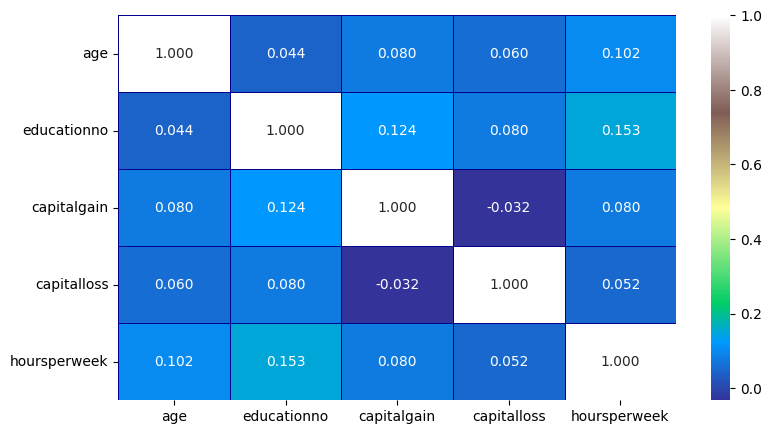

In [30]:
#heat map
plt.figure(figsize=(9,5))
sns.heatmap(df_train.corr(),annot=True,cmap='terrain',fmt='.3f',linewidth=0.5,linecolor='darkblue')
plt.show()

# **PairPlot**

<Figure size 900x500 with 0 Axes>

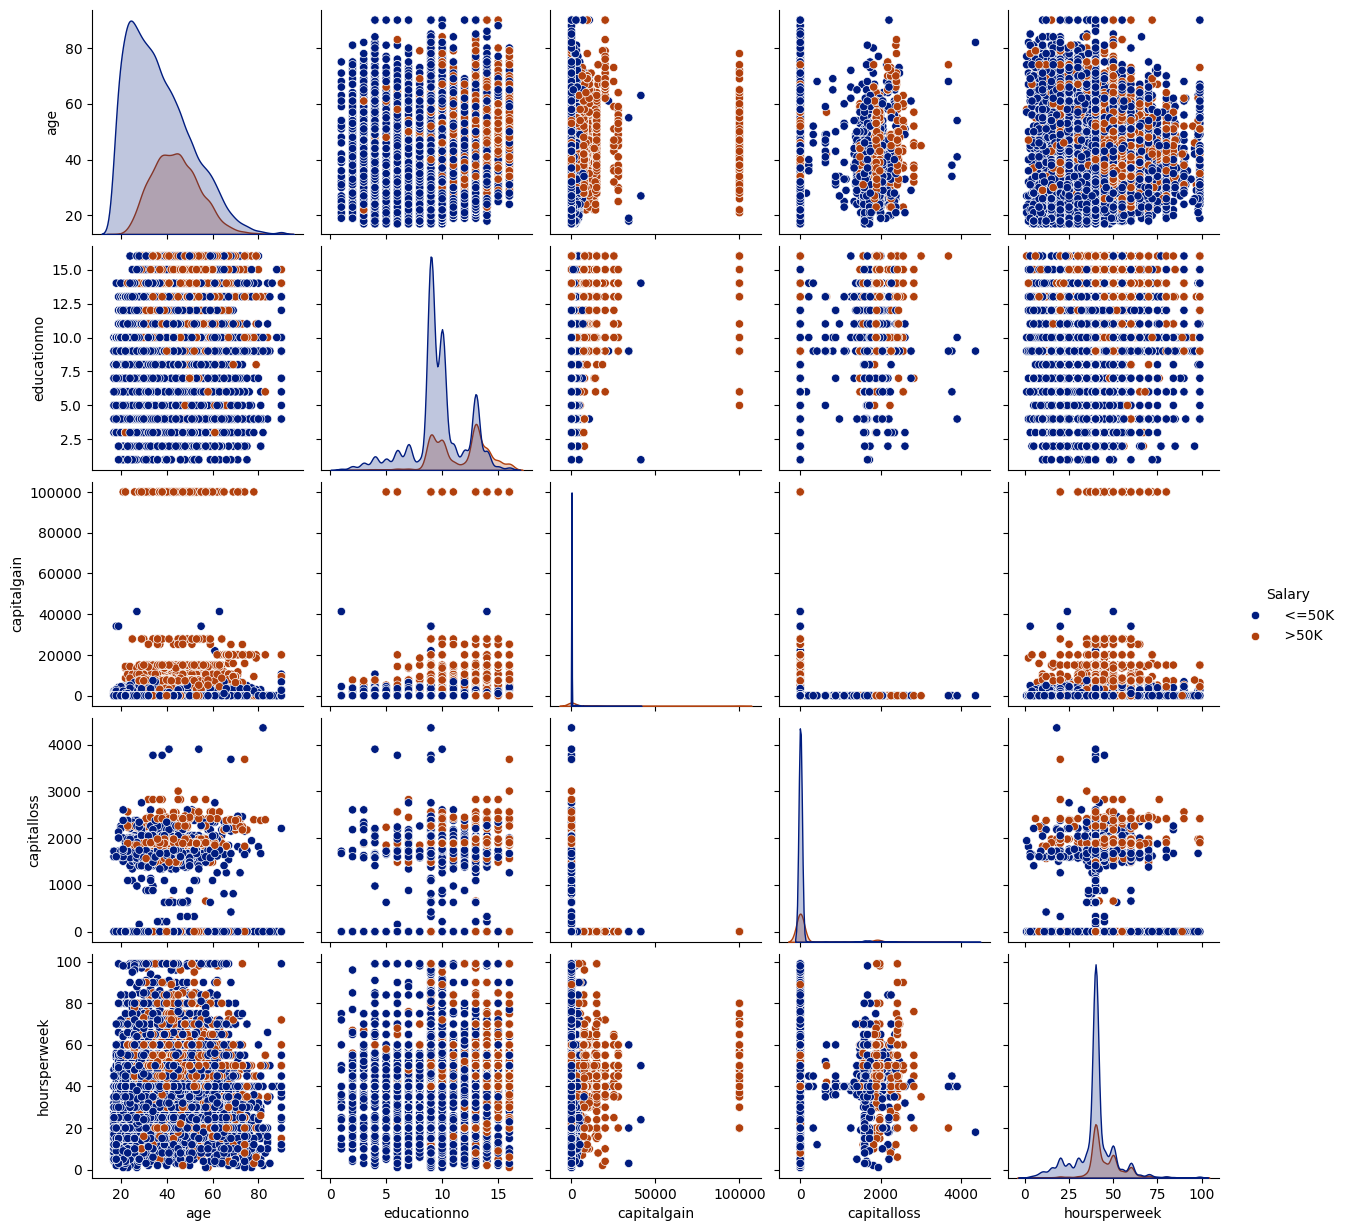

In [31]:
#pairwise plot
plt.figure(figsize=(9,5))
sns.pairplot(df_train,hue='Salary',palette='dark')
plt.show()

# **Histogram**

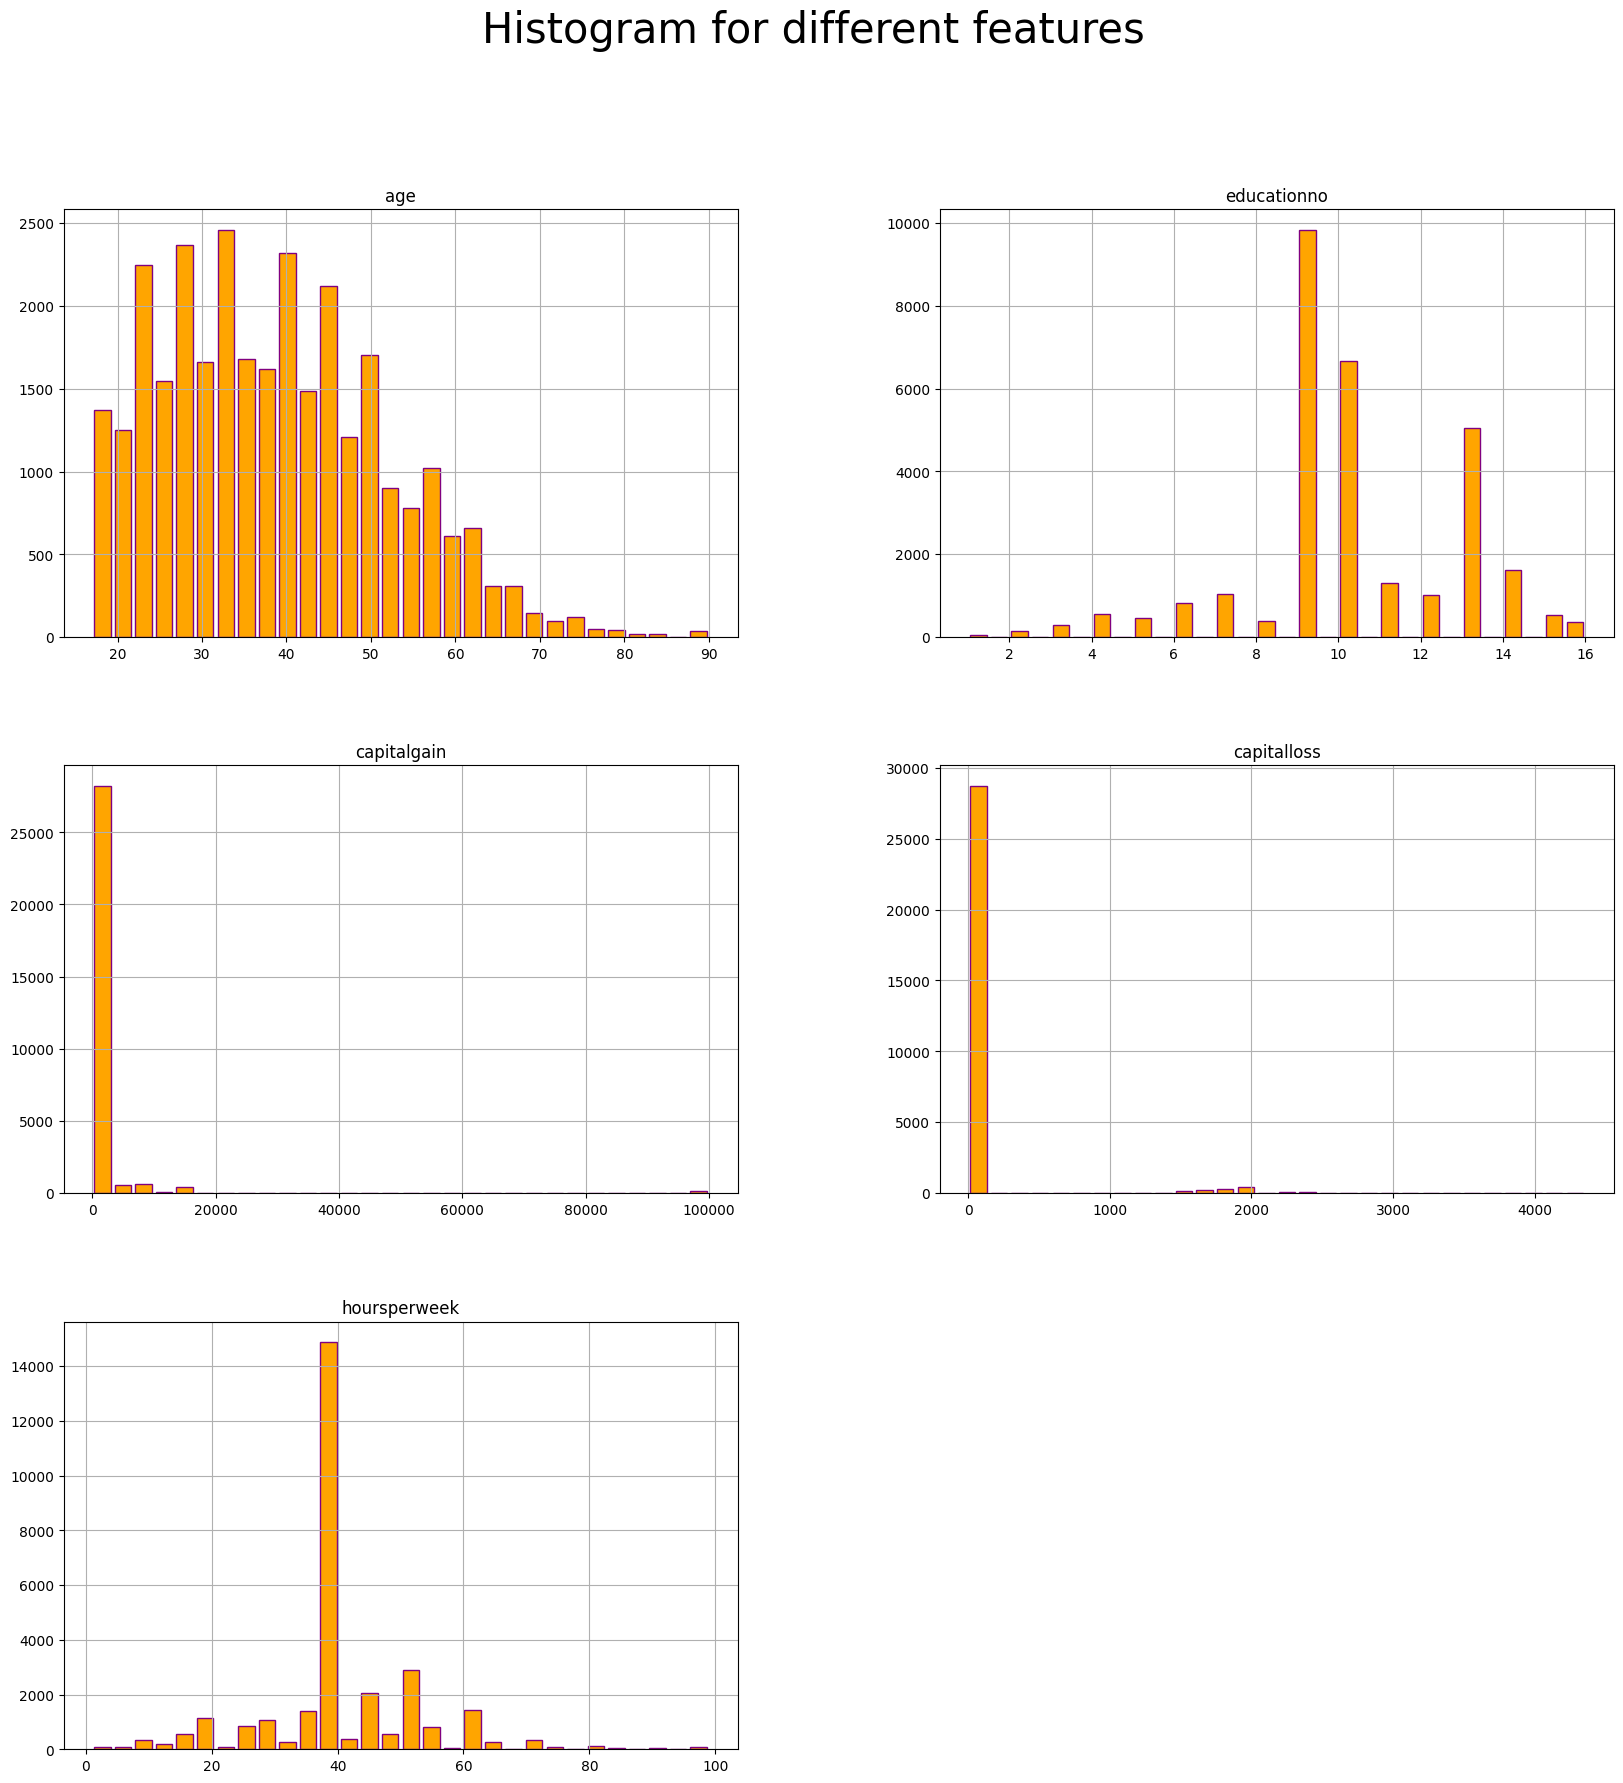

In [32]:
#histogram for different features
df_train.hist(bins=30,figsize=(20,20),color='orange',rwidth=0.8,edgecolor='purple')
plt.suptitle('Histogram for different features',ha='center',fontsize=30)
plt.show()

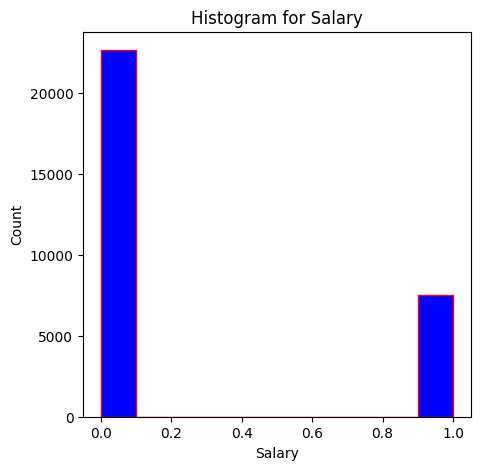

In [107]:
#histogram
plt.figure(figsize=(5,5))
plt.hist(df_train['Salary'],color='blue',rwidth=1,edgecolor='red')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Histogram for Salary')
plt.show()

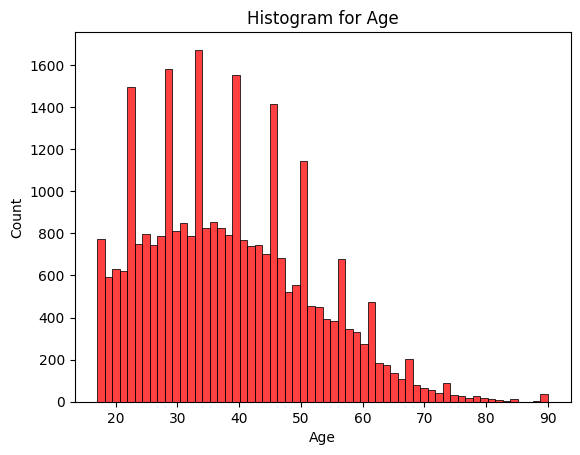

In [34]:
#histogram for age
sns.histplot(df_train['age'],color='red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram for Age')
plt.show()

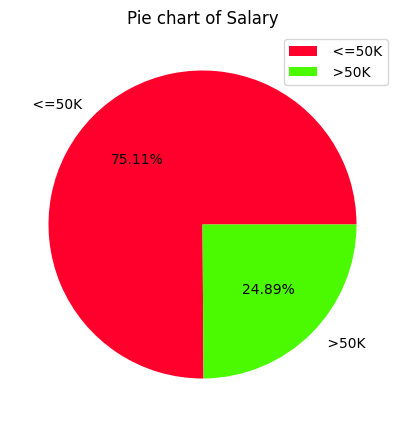

In [35]:
#pie chart
plt.figure(figsize=(5,5))
color=sns.color_palette('prism_r')
plt.pie(df_train['Salary'].value_counts(),labels=df_train['Salary'].unique(),autopct="%.2f%%",colors=color)
plt.legend()
plt.title('Pie chart of Salary')
plt.show()

# **BoxPlot**

<Axes: >

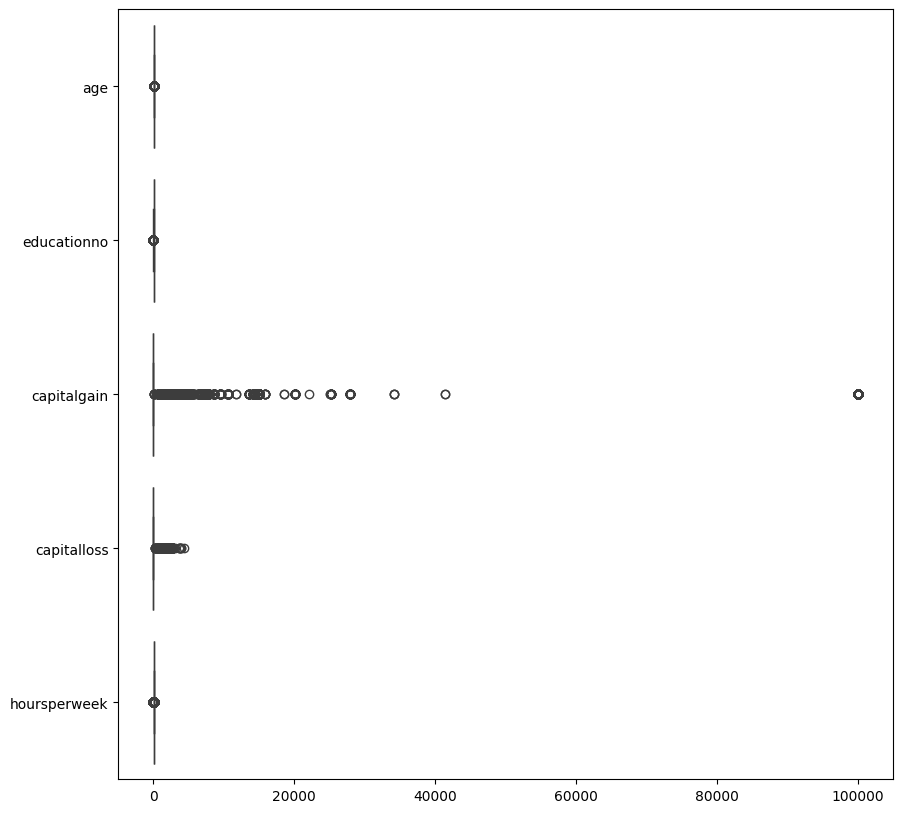

In [36]:
#boxplot
plt.figure(figsize=(10,10))
sns.boxplot(df_train,orient='h')

# ***Plots with cross tab***

# **For BiVariate Analysis**

Text(0, 0.5, 'salary')

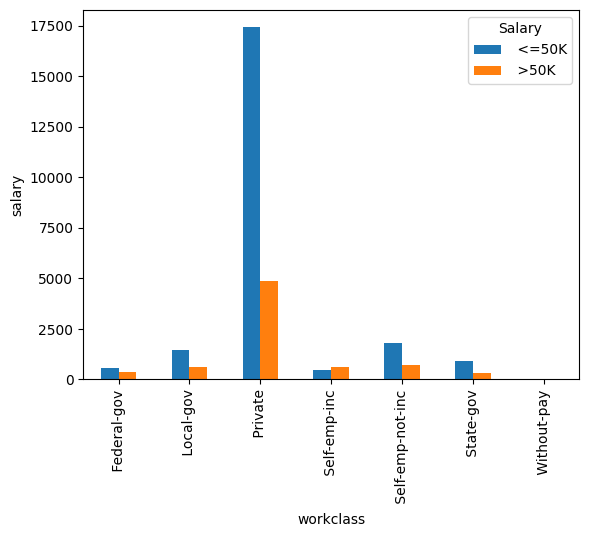

In [37]:
#relationship between workclass and salary
pd.crosstab(df_train['workclass'],df_train['Salary']).plot(kind='bar')
plt.xlabel('workclass')
plt.ylabel('salary')

Text(0, 0.5, 'salary')

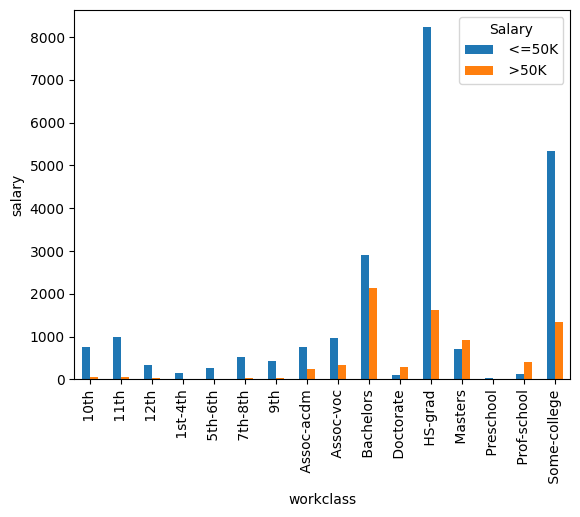

In [38]:
#relationship between education and salary
pd.crosstab(df_train['education'],df_train['Salary']).plot(kind='bar')
plt.xlabel('workclass')
plt.ylabel('salary')

Text(0, 0.5, 'Salary')

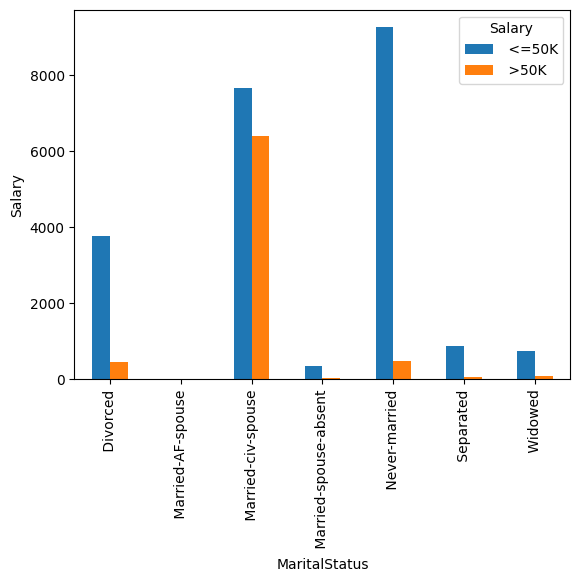

In [39]:
#relationship between maritualstatus and salary
pd.crosstab(df_train['maritalstatus'],df_train['Salary']).plot(kind='bar')
plt.xlabel('MaritalStatus')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

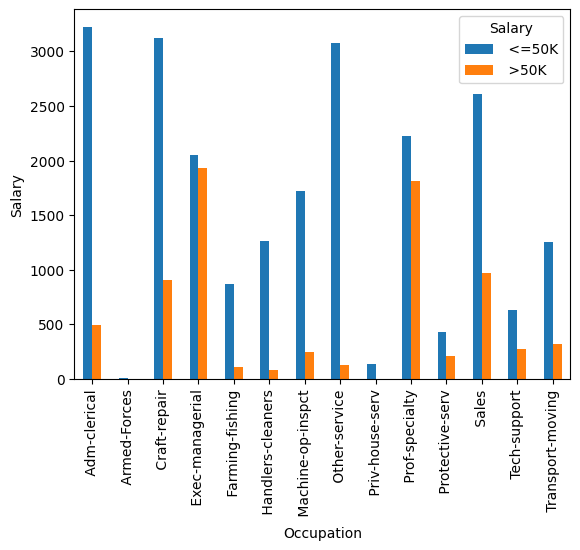

In [40]:
#relationship between occupation and salary
pd.crosstab(df_train['occupation'],df_train['Salary']).plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

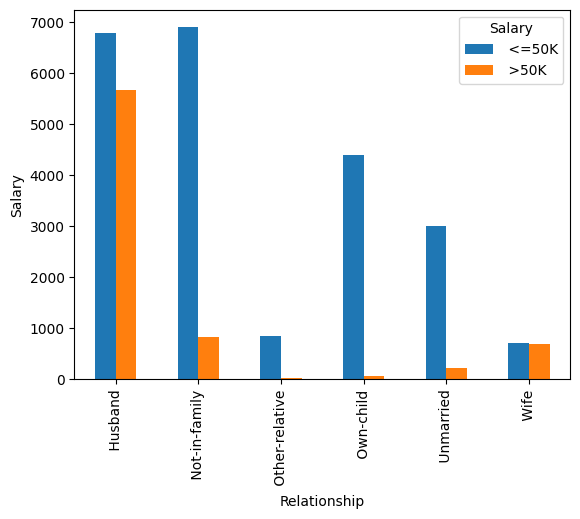

In [41]:
#relationship between relationship and salary
pd.crosstab(df_train['relationship'],df_train['Salary']).plot(kind='bar')
plt.xlabel('Relationship')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

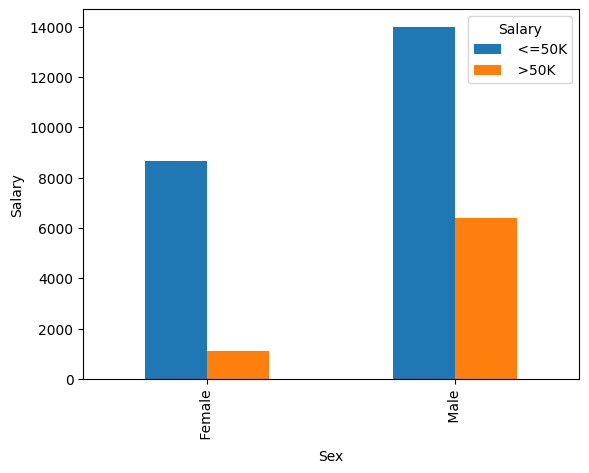

In [42]:
#relationship between sex and salary
pd.crosstab(df_train['sex'],df_train['Salary']).plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Salary')

# **For Univariate Analysis**

Text(0.5, 1.0, 'WorkClass')

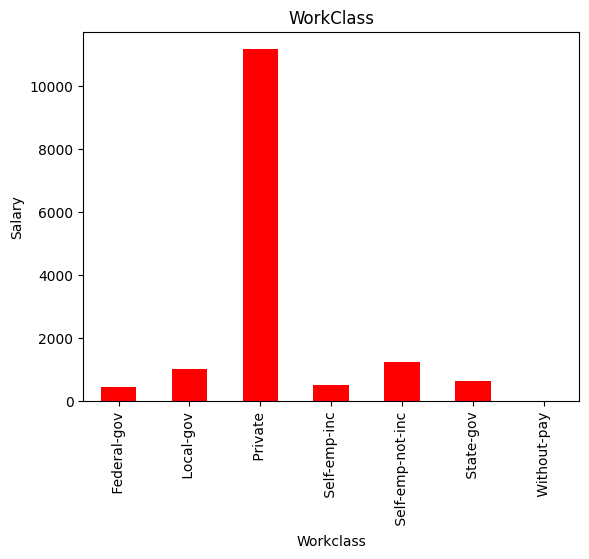

In [43]:
#Plot for Workclass
pd.crosstab(df_train['Salary'],df_train['workclass']).mean().plot(kind='bar',color='red')
plt.xlabel('Workclass')
plt.ylabel('Salary')
plt.title('WorkClass')

Text(0.5, 1.0, 'Education')

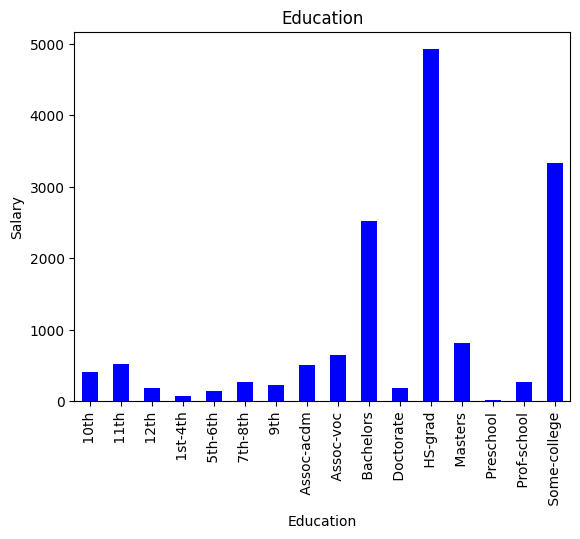

In [44]:
#Plot for Education
pd.crosstab(df_train['Salary'],df_train['education']).mean().plot(kind='bar',color='blue')
plt.xlabel('Education')
plt.ylabel('Salary')
plt.title('Education')

Text(0.5, 1.0, 'MaritalStatus')

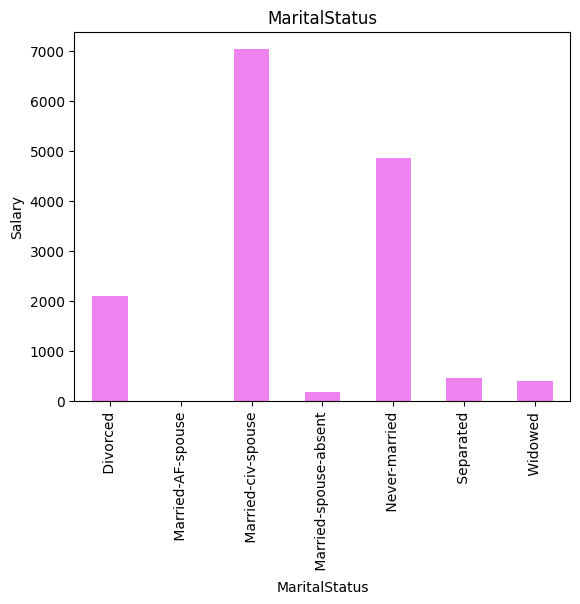

In [45]:
#Plot for MaritalStatus
pd.crosstab(df_train['Salary'],df_train['maritalstatus']).mean().plot(kind='bar',color='violet')
plt.xlabel('MaritalStatus')
plt.ylabel('Salary')
plt.title('MaritalStatus')

Text(0.5, 1.0, 'Occupation')

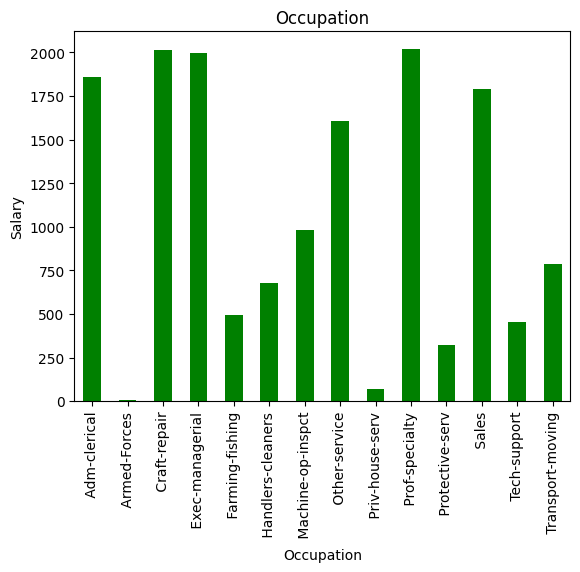

In [46]:
#Plot for Occupation
pd.crosstab(df_train['Salary'],df_train['occupation']).mean().plot(kind='bar',color='green')
plt.xlabel('Occupation')
plt.ylabel('Salary')
plt.title('Occupation')

Text(0.5, 1.0, 'Relationship')

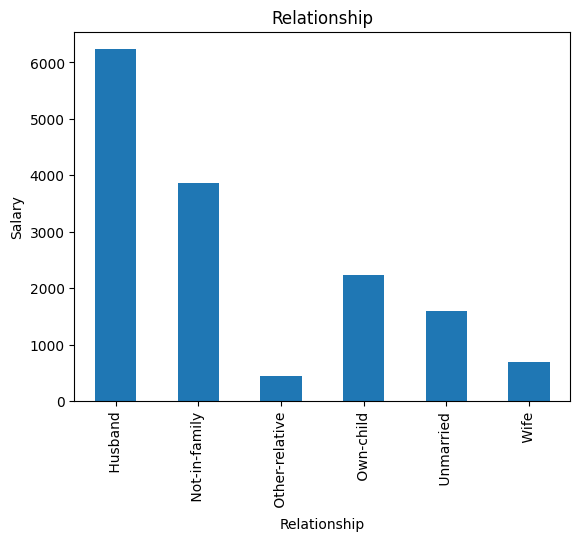

In [47]:
#Plot for Relationship
pd.crosstab(df_train['Salary'],df_train['relationship']).mean().plot(kind='bar')
plt.xlabel('Relationship')
plt.ylabel('Salary')
plt.title('Relationship')

Text(0.5, 1.0, 'Race')

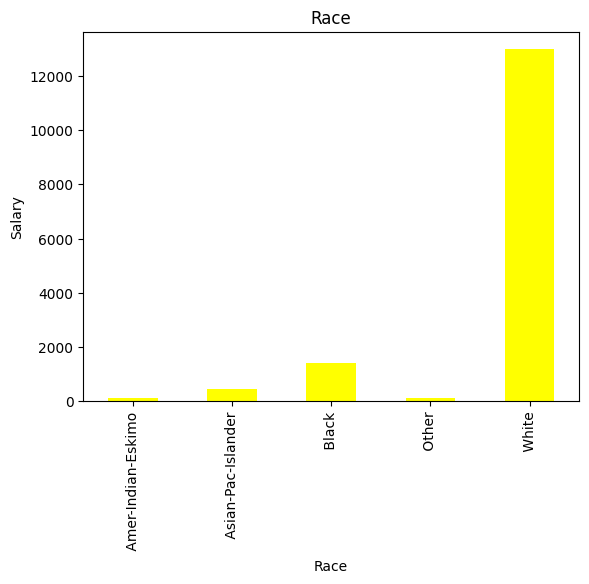

In [48]:
#Plot for Race
pd.crosstab(df_train['Salary'],df_train['race']).mean().plot(kind='bar',color='yellow')
plt.xlabel('Race')
plt.ylabel('Salary')
plt.title('Race')

Text(0.5, 1.0, 'Gender')

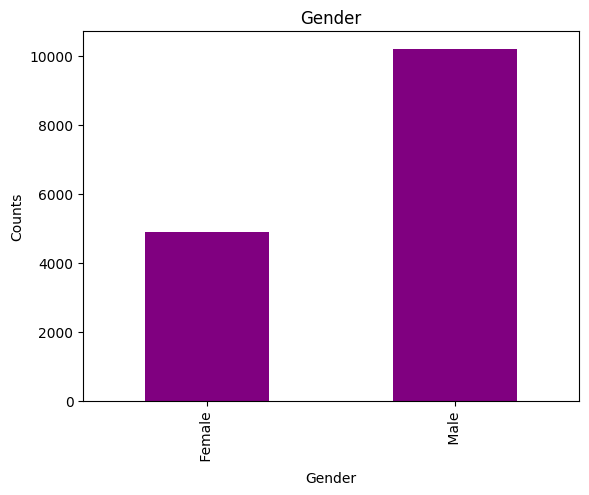

In [49]:
#Plot for Gender
pd.crosstab(df_train['Salary'],df_train['sex']).mean().plot(kind='bar',color='purple')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Gender')

# **Count plots**

Text(0.5, 1.0, 'Working Class')

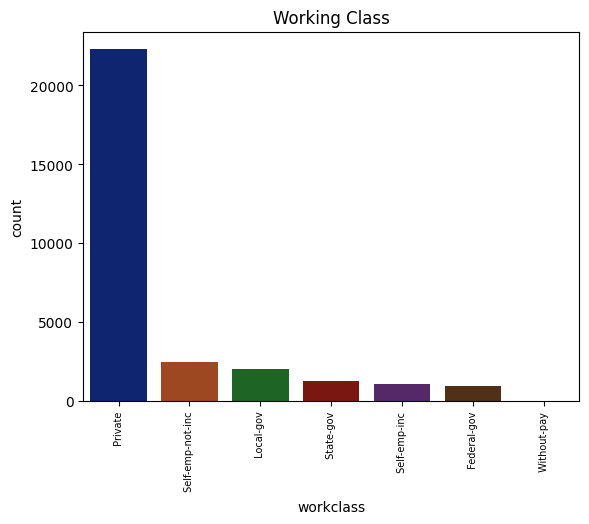

In [50]:
#CountPlot for WorkClass
sns.countplot(x='workclass',data=df_train,palette='dark',order=df_train['workclass'].value_counts().index)
plt.xticks(rotation=90,fontsize=7)
plt.title('Working Class')

Text(0.5, 1.0, 'Education')

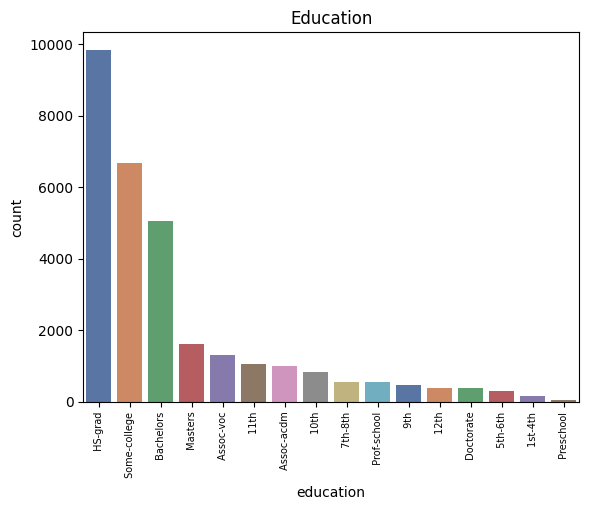

In [51]:
#CountPlot for Education
sns.countplot(x='education',palette='deep',data=df_train,order=df_train['education'].value_counts().index)
plt.xticks(rotation=90,fontsize=7)
plt.title('Education')

Text(0.5, 1.0, 'MartialStatus')

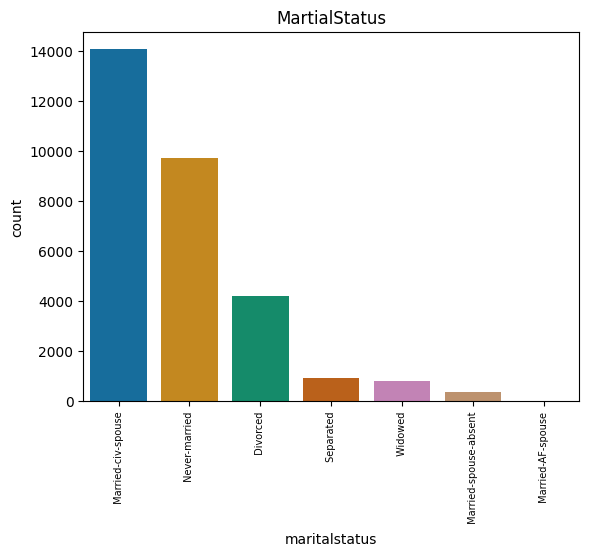

In [52]:
#CountPlot for MaritalStatus
sns.countplot(x='maritalstatus',data=df_train,palette='colorblind',order=df_train['maritalstatus'].value_counts().index)
plt.xticks(rotation=90,fontsize=7)
plt.title('MartialStatus')

Text(0.5, 1.0, 'Occuapation')

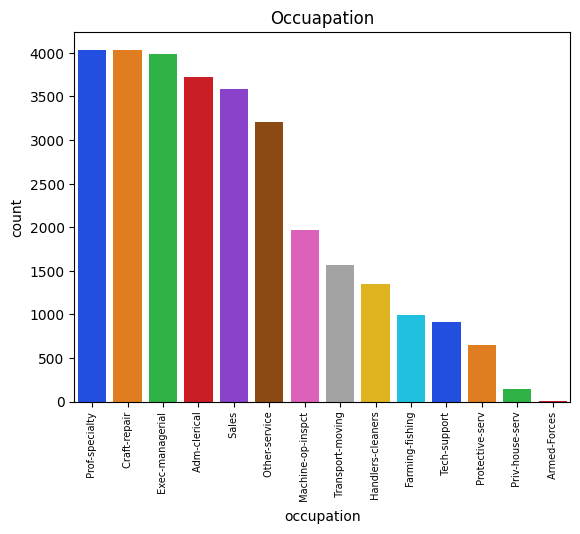

In [53]:
#CountPlot for Occupation
sns.countplot(x='occupation',data=df_train,palette='bright',order=df_train['occupation'].value_counts().index)
plt.xticks(rotation=90,fontsize=7)
plt.title('Occuapation')

Text(0.5, 1.0, 'RelationShip')

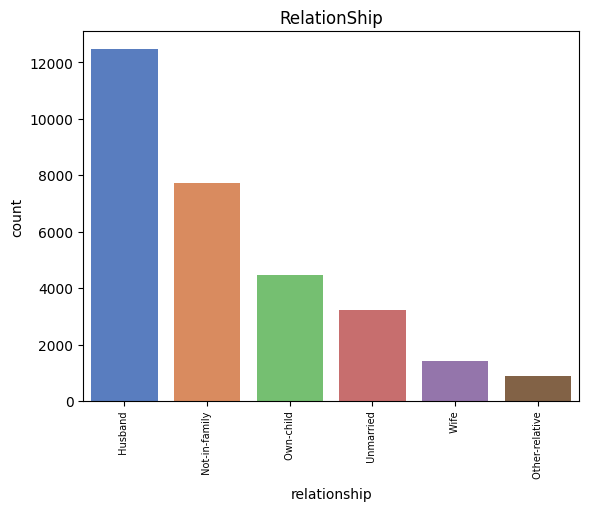

In [54]:
#CountPlot for Relationship
sns.countplot(x='relationship',data=df_train,palette='muted',order=df_train['relationship'].value_counts().index)
plt.xticks(rotation=90,fontsize=7)
plt.title('RelationShip')

Text(0.5, 1.0, 'SEX')

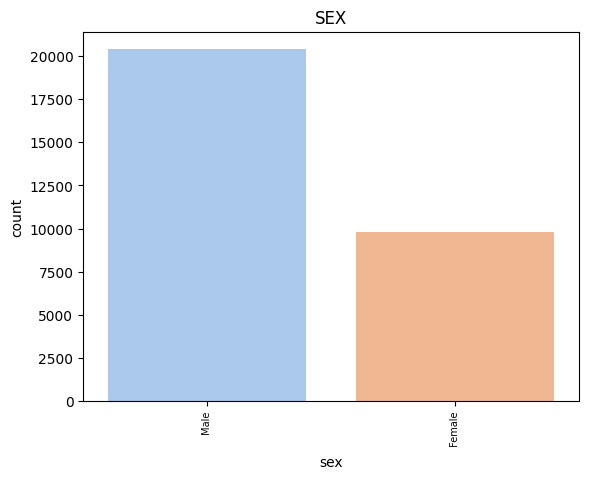

In [55]:
#Countplot for Gender
sns.countplot(x='sex',data=df_train,palette='pastel',order=df_train['sex'].value_counts().index)
plt.xticks(rotation=90,fontsize=7)
plt.title('SEX')

Text(0.5, 1.0, 'Salary')

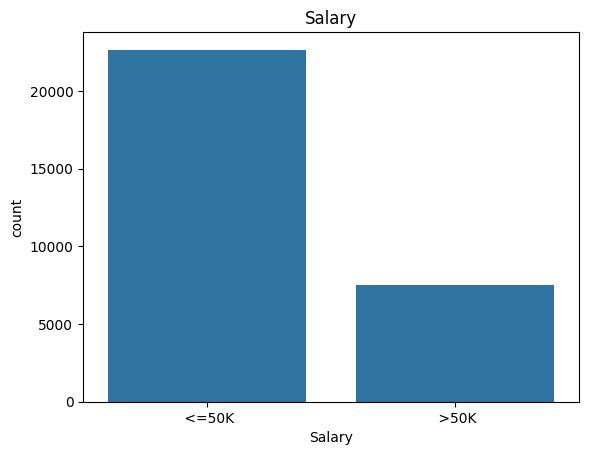

In [56]:
#countplot of salary
sns.countplot(x='Salary',data=df_train)
plt.title('Salary')

# **Label Encoding**

In [57]:
#performing preprocessing for labelEncoder

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [59]:
string=['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']

In [60]:
for i in string:
  df_train[i]=le.fit_transform(df_train[i])
  df_test[i]=le.fit_transform(df_test[i])

In [61]:
df_train

age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
30156   27          2          7           12              2          12   
30157   40          2         11            9              2           6   
30158   58          2         11            9              6           0   
30159   22          2         11            9              4           0   
30160   52          3         11            9              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 1     4    1         2174            0            40   
1                 0     4    1            0            0            13   
2                 1     4    1            0            0            40   
3                 0     2    1            0            0            40   
4                 5     2    0            0            0            40   
...             ...   ...  ...          ...          ...           ...   
30156             5     4    0            0            0            38   
30157             0     4    1            0            0            40   
30158             4     4    0            0            0            40   
30159             3     4    1            0            0            20   
30160             5     4    0        15024            0            40   

       native  Salary  
0          37       0  
1          37       0  
2          37       0  
3          37       0  
4           4       0  
...       ...     ...  
30156      37       0  
30157      37       1  
30158      37       0  
30159      37       0  
30160      37       1  

[30161 rows x 14 columns]

In [62]:
df_test

age  workclass  education  educationno  maritalstatus  occupation  \
0       25          2          1            7              4           6   
1       38          2         11            9              2           4   
2       28          1          7           12              2          10   
3       44          2         15           10              2           6   
4       34          2          0            6              4           7   
...    ...        ...        ...          ...            ...         ...   
15055   33          2          9           13              4           9   
15056   39          2          9           13              0           9   
15057   38          2          9           13              2           9   
15058   44          2          9           13              0           0   
15059   35          3          9           13              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 3     2    1            0            0            40   
1                 0     4    1            0            0            50   
2                 0     4    1            0            0            40   
3                 0     2    1         7688            0            40   
4                 1     4    1            0            0            30   
...             ...   ...  ...          ...          ...           ...   
15055             3     4    1            0            0            40   
15056             1     4    0            0            0            36   
15057             0     4    1            0            0            50   
15058             3     1    1         5455            0            40   
15059             0     4    1            0            0            60   

       native  Salary  
0          37       0  
1          37       0  
2          37       1  
3          37       1  
4          37       0  
...       ...     ...  
15055      37       0  
15056      37       0  
15057      37       0  
15058      37       0  
15059      37       1  

[15060 rows x 14 columns]

In [63]:
#now we have to perform feature scaling to reduce the scale

# **Feature Scaling**

In [64]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [65]:
df_train.iloc[:,:-1]=ms.fit_transform(df_train.iloc[:,:-1])
df_test.iloc[:,:-1]=ms.fit_transform(df_test.iloc[:,:-1])

In [66]:
df_train

age  workclass  education  educationno  maritalstatus  occupation  \
0      0.301370   0.833333   0.600000     0.800000       0.666667    0.000000   
1      0.452055   0.666667   0.600000     0.800000       0.333333    0.230769   
2      0.287671   0.333333   0.733333     0.533333       0.000000    0.384615   
3      0.493151   0.333333   0.066667     0.400000       0.333333    0.384615   
4      0.150685   0.333333   0.600000     0.800000       0.333333    0.692308   
...         ...        ...        ...          ...            ...         ...   
30156  0.136986   0.333333   0.466667     0.733333       0.333333    0.923077   
30157  0.315068   0.333333   0.733333     0.533333       0.333333    0.461538   
30158  0.561644   0.333333   0.733333     0.533333       1.000000    0.000000   
30159  0.068493   0.333333   0.733333     0.533333       0.666667    0.000000   
30160  0.479452   0.500000   0.733333     0.533333       0.333333    0.230769   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0               0.2   1.0  1.0     0.021740          0.0      0.397959   
1               0.0   1.0  1.0     0.000000          0.0      0.122449   
2               0.2   1.0  1.0     0.000000          0.0      0.397959   
3               0.0   0.5  1.0     0.000000          0.0      0.397959   
4               1.0   0.5  0.0     0.000000          0.0      0.397959   
...             ...   ...  ...          ...          ...           ...   
30156           1.0   1.0  0.0     0.000000          0.0      0.377551   
30157           0.0   1.0  1.0     0.000000          0.0      0.397959   
30158           0.8   1.0  0.0     0.000000          0.0      0.397959   
30159           0.6   1.0  1.0     0.000000          0.0      0.193878   
30160           1.0   1.0  0.0     0.150242          0.0      0.397959   

         native  Salary  
0      0.948718       0  
1      0.948718       0  
2      0.948718       0  
3      0.948718       0  
4      0.102564       0  
...         ...     ...  
30156  0.948718       0  
30157  0.948718       1  
30158  0.948718       0  
30159  0.948718       0  
30160  0.948718       1  

[30161 rows x 14 columns]

**Correlation**

In [67]:
#correlation
df_train.corr()

age  workclass  education  educationno  maritalstatus  \
age            1.000000   0.080537  -0.001091     0.043525      -0.276363   
workclass      0.080537   1.000000   0.017864     0.037833      -0.034235   
education     -0.001091   0.017864   1.000000     0.345420      -0.040704   
educationno    0.043525   0.037833   0.345420     1.000000      -0.063419   
maritalstatus -0.276363  -0.034235  -0.040704    -0.063419       1.000000   
occupation    -0.005682   0.015572  -0.038213     0.087717       0.022655   
relationship  -0.246452  -0.067414  -0.012732    -0.091935       0.177955   
race           0.023380   0.044734   0.011139     0.032805      -0.068641   
sex            0.081972   0.074966  -0.027831     0.006155      -0.119774   
capitalgain    0.080152   0.035349   0.030582     0.124416      -0.042414   
capitalloss    0.060278   0.007244   0.014822     0.079691      -0.035385   
hoursperweek   0.101598   0.050723   0.059892     0.152522      -0.189004   
native        -0.001548   0.007598   0.079715     0.092625      -0.026057   
Salary         0.241991   0.018040   0.079013     0.335287      -0.193504   

               occupation  relationship      race       sex  capitalgain  \
age             -0.005682     -0.246452  0.023380  0.081972     0.080152   
workclass        0.015572     -0.067414  0.044734  0.074966     0.035349   
education       -0.038213     -0.012732  0.011139 -0.027831     0.030582   
educationno      0.087717     -0.091935  0.032805  0.006155     0.124416   
maritalstatus    0.022655      0.177955 -0.068641 -0.119774    -0.042414   
occupation       1.000000     -0.053727  0.000717  0.062316     0.022162   
relationship    -0.053727      1.000000 -0.117148 -0.584881    -0.058257   
race             0.000717     -0.117148  1.000000  0.089207     0.014355   
sex              0.062316     -0.584881  0.089207  1.000000     0.048809   
capitalgain      0.022162     -0.058257  0.014355  0.048809     1.000000   
capitalloss      0.014612     -0.063659  0.023461  0.047285    -0.032218   
hoursperweek     0.018365     -0.257850  0.048533  0.231272     0.080431   
native          -0.003298     -0.010661  0.126507  0.000063     0.008513   
Salary           0.051577     -0.250998  0.071666  0.216680     0.221195   

               capitalloss  hoursperweek    native    Salary  
age               0.060278      0.101598 -0.001548  0.241991  
workclass         0.007244      0.050723  0.007598  0.018040  
education         0.014822      0.059892  0.079715  0.079013  
educationno       0.079691      0.152522  0.092625  0.335287  
maritalstatus    -0.035385     -0.189004 -0.026057 -0.193504  
occupation        0.014612      0.018365 -0.003298  0.051577  
relationship     -0.063659     -0.257850 -0.010661 -0.250998  
race              0.023461      0.048533  0.126507  0.071666  
sex               0.047285      0.231272  0.000063  0.216680  
capitalgain      -0.032218      0.080431  0.008513  0.221195  
capitalloss       1.000000      0.052454  0.010193  0.150222  
hoursperweek      0.052454      1.000000  0.008429  0.229480  
native            0.010193      0.008429  1.000000  0.023515  
Salary            0.150222      0.229480  0.023515  1.000000

<Axes: >

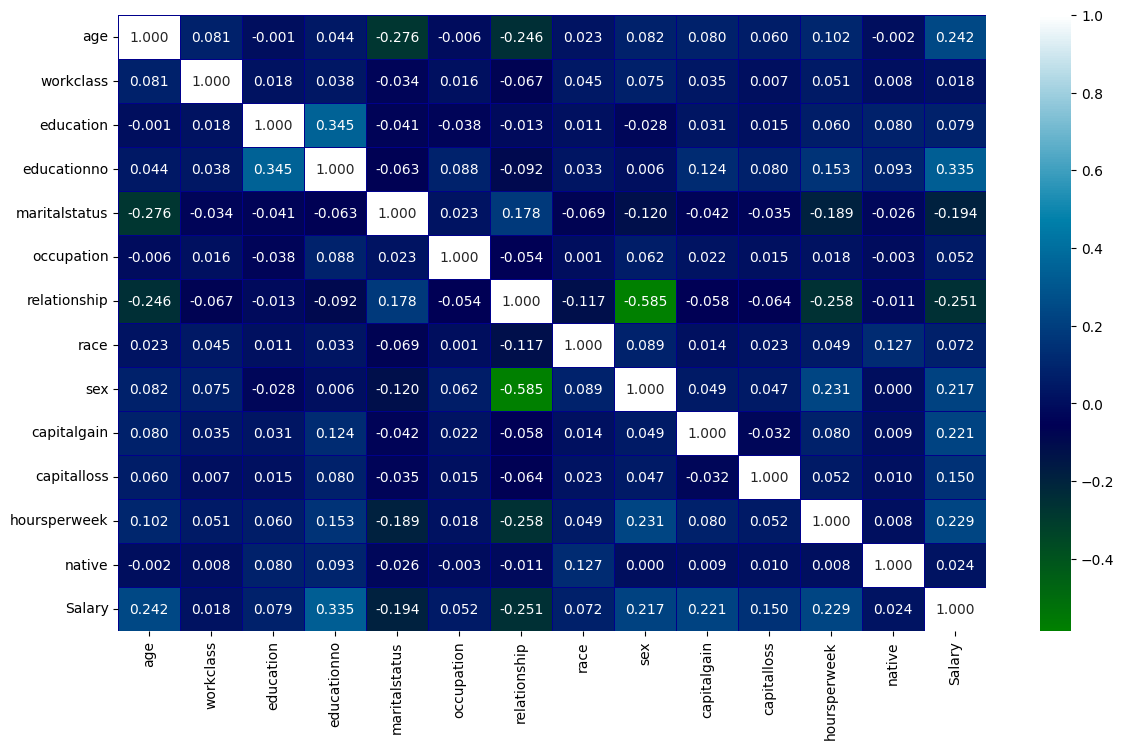

In [68]:
#heat map
plt.figure(figsize=(14,8))
sns.heatmap(df_train.corr(),annot=True,cmap='ocean',fmt='.3f',linewidth=0.5,linecolor='darkblue')

<Figure size 900x600 with 0 Axes>

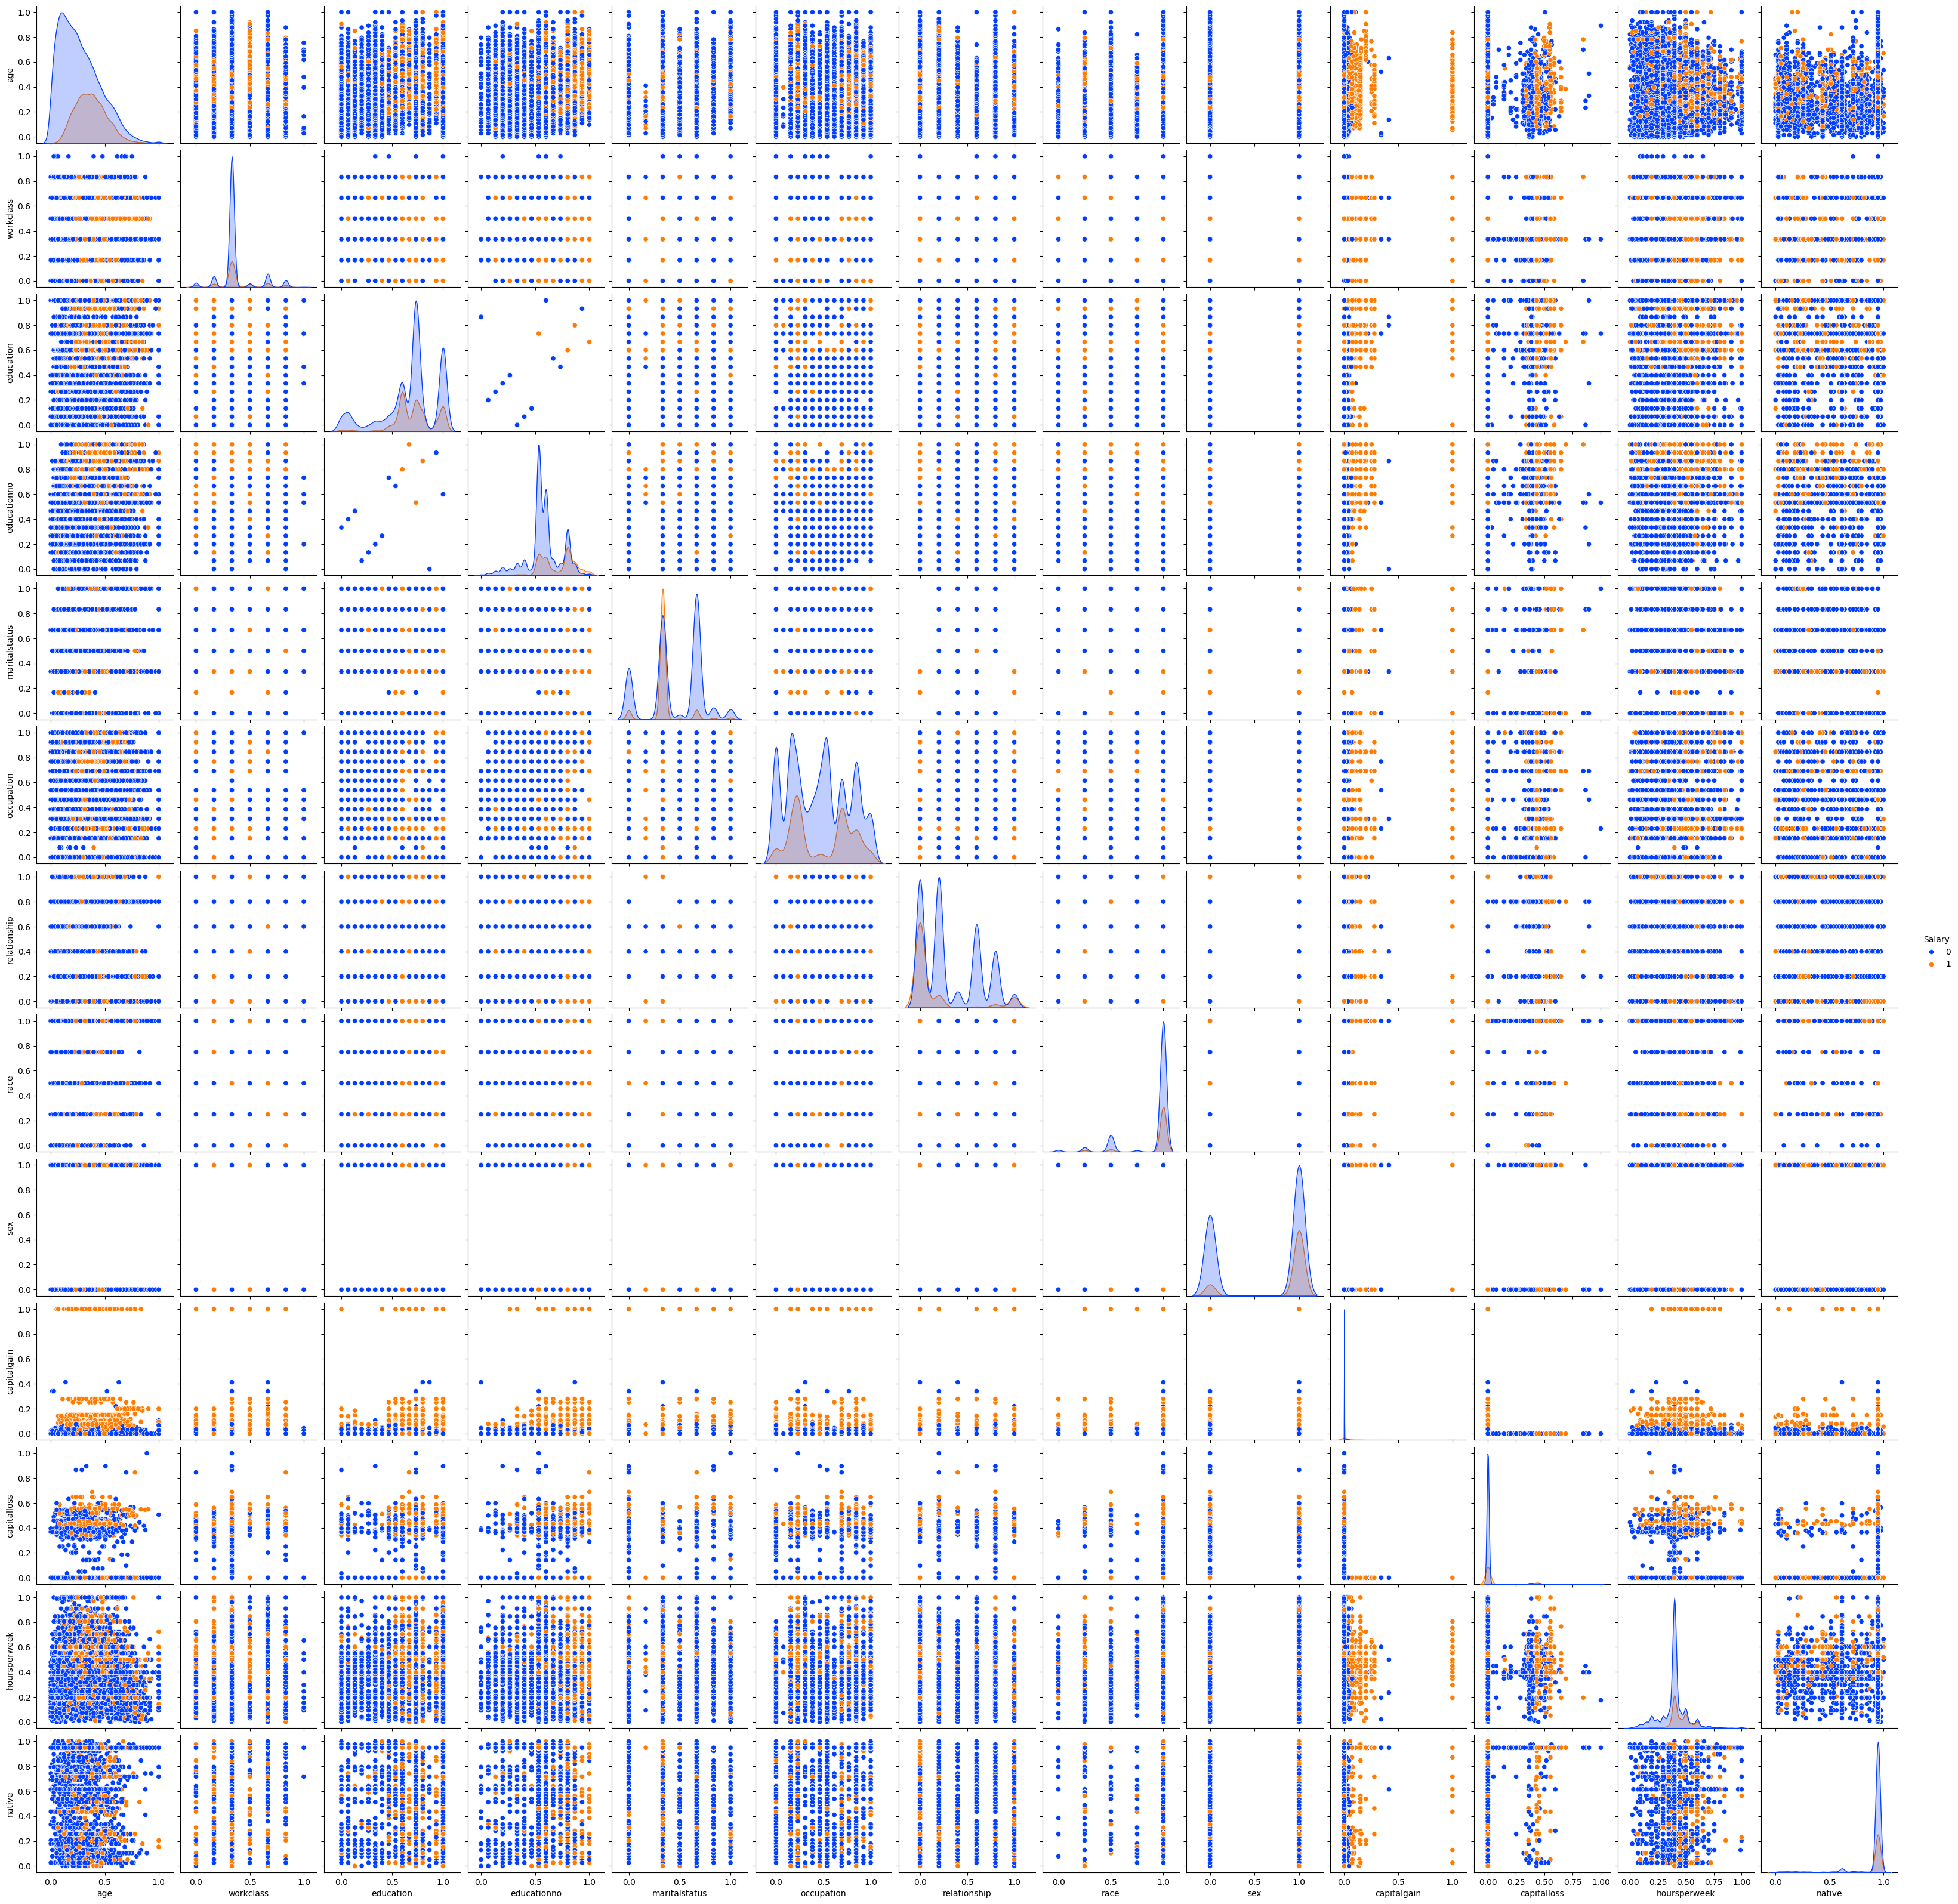

In [69]:
#pairplot
plt.figure(figsize=(9,6))
sns.pairplot(df_train,hue='Salary',palette='bright')

# **spliting into training and testing**

**training data**

In [70]:
#training data
xtrain=df_train.iloc[:,:-1]
ytrain=df_train.iloc[:,-1]

**testing data**

In [71]:
#testing data
xtest=df_test.iloc[:,:-1]
ytest=df_test.iloc[:,-1]

In [72]:
xtrain

age  workclass  education  educationno  maritalstatus  occupation  \
0      0.301370   0.833333   0.600000     0.800000       0.666667    0.000000   
1      0.452055   0.666667   0.600000     0.800000       0.333333    0.230769   
2      0.287671   0.333333   0.733333     0.533333       0.000000    0.384615   
3      0.493151   0.333333   0.066667     0.400000       0.333333    0.384615   
4      0.150685   0.333333   0.600000     0.800000       0.333333    0.692308   
...         ...        ...        ...          ...            ...         ...   
30156  0.136986   0.333333   0.466667     0.733333       0.333333    0.923077   
30157  0.315068   0.333333   0.733333     0.533333       0.333333    0.461538   
30158  0.561644   0.333333   0.733333     0.533333       1.000000    0.000000   
30159  0.068493   0.333333   0.733333     0.533333       0.666667    0.000000   
30160  0.479452   0.500000   0.733333     0.533333       0.333333    0.230769   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0               0.2   1.0  1.0     0.021740          0.0      0.397959   
1               0.0   1.0  1.0     0.000000          0.0      0.122449   
2               0.2   1.0  1.0     0.000000          0.0      0.397959   
3               0.0   0.5  1.0     0.000000          0.0      0.397959   
4               1.0   0.5  0.0     0.000000          0.0      0.397959   
...             ...   ...  ...          ...          ...           ...   
30156           1.0   1.0  0.0     0.000000          0.0      0.377551   
30157           0.0   1.0  1.0     0.000000          0.0      0.397959   
30158           0.8   1.0  0.0     0.000000          0.0      0.397959   
30159           0.6   1.0  1.0     0.000000          0.0      0.193878   
30160           1.0   1.0  0.0     0.150242          0.0      0.397959   

         native  
0      0.948718  
1      0.948718  
2      0.948718  
3      0.948718  
4      0.102564  
...         ...  
30156  0.948718  
30157  0.948718  
30158  0.948718  
30159  0.948718  
30160  0.948718  

[30161 rows x 13 columns]

In [73]:
ytrain

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int64

In [74]:
xtest

age  workclass  education  educationno  maritalstatus  occupation  \
0      0.109589   0.333333   0.066667     0.400000       0.666667    0.461538   
1      0.287671   0.333333   0.733333     0.533333       0.333333    0.307692   
2      0.150685   0.166667   0.466667     0.733333       0.333333    0.769231   
3      0.369863   0.333333   1.000000     0.600000       0.333333    0.461538   
4      0.232877   0.333333   0.000000     0.333333       0.666667    0.538462   
...         ...        ...        ...          ...            ...         ...   
15055  0.219178   0.333333   0.600000     0.800000       0.666667    0.692308   
15056  0.301370   0.333333   0.600000     0.800000       0.000000    0.692308   
15057  0.287671   0.333333   0.600000     0.800000       0.333333    0.692308   
15058  0.369863   0.333333   0.600000     0.800000       0.000000    0.000000   
15059  0.246575   0.500000   0.600000     0.800000       0.333333    0.230769   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0               0.6  0.50  1.0     0.000000          0.0      0.397959   
1               0.0  1.00  1.0     0.000000          0.0      0.500000   
2               0.0  1.00  1.0     0.000000          0.0      0.397959   
3               0.0  0.50  1.0     0.076881          0.0      0.397959   
4               0.2  1.00  1.0     0.000000          0.0      0.295918   
...             ...   ...  ...          ...          ...           ...   
15055           0.6  1.00  1.0     0.000000          0.0      0.397959   
15056           0.2  1.00  0.0     0.000000          0.0      0.357143   
15057           0.0  1.00  1.0     0.000000          0.0      0.500000   
15058           0.6  0.25  1.0     0.054551          0.0      0.397959   
15059           0.0  1.00  1.0     0.000000          0.0      0.602041   

         native  
0      0.948718  
1      0.948718  
2      0.948718  
3      0.948718  
4      0.948718  
...         ...  
15055  0.948718  
15056  0.948718  
15057  0.948718  
15058  0.948718  
15059  0.948718  

[15060 rows x 13 columns]

In [75]:
ytest

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int64

In [76]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(30161, 13)
(30161,)
(15060, 13)
(15060,)


## **Building Support Vector Machines Model**

In [77]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
model=SVC()

# **1.kernel=linear**

In [78]:
#train and test
model_linear=SVC(kernel='linear',C=15,gamma=5)
model_linear.fit(xtrain,ytrain)
ypred_l=model_linear.predict(xtest)
print(classification_report(ytest,ypred_l))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     11360
           1       0.75      0.33      0.46      3700

    accuracy                           0.81     15060
   macro avg       0.78      0.65      0.67     15060
weighted avg       0.80      0.81      0.78     15060



In [79]:
#confusion matrix
print(confusion_matrix(ytest,ypred_l))

[[10965   395]
 [ 2492  1208]]


In [80]:
print('Accuracy=',np.round(accuracy_score(ytest,ypred_l),2))

Accuracy= 0.81


In [81]:
#accuracy as linear kernal is 81%

**Accuracy : 81%**

# **2.kernel=poly**

In [82]:
#train and test
model_poly=SVC(kernel='poly',C=1.0,gamma=0.5)
model_poly.fit(xtrain,ytrain)
ypred_p=model_poly.predict(xtest)
print(classification_report(ytest,ypred_p))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11360
           1       0.74      0.56      0.64      3700

    accuracy                           0.84     15060
   macro avg       0.80      0.75      0.77     15060
weighted avg       0.84      0.84      0.84     15060



In [83]:
#confusion matrix
confusion_matrix(ytest,ypred_p)

array([[10636,   724],
       [ 1635,  2065]])

In [84]:
print('Accuracy=',np.round(accuracy_score(ytest,ypred_p),2))

Accuracy= 0.84


In [85]:
#accuracy as poly kernal is 84%

**Accuracy : 84%**

# **3.kernel=rbf**

In [86]:
#train and test
model_rbf=SVC(kernel='rbf',C=15,gamma=50,random_state=15)
model_rbf.fit(xtrain,ytrain)
ypred_r=model_rbf.predict(xtest)
print(classification_report(ytest,ypred_l))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     11360
           1       0.75      0.33      0.46      3700

    accuracy                           0.81     15060
   macro avg       0.78      0.65      0.67     15060
weighted avg       0.80      0.81      0.78     15060



In [87]:
#confusion matrix
confusion_matrix(ytest,ypred_r)

array([[10365,   995],
       [ 1920,  1780]])

In [88]:
print('Accuracy=',np.round(accuracy_score(ytest,ypred_r),2))

Accuracy= 0.81


In [89]:
#Accuracy is 82%

**Accuracy : 82%**

# **4.kernel=sigmoid**

In [90]:
model_sig=SVC(kernel='sigmoid',C=15,gamma=0.1,degree=3,random_state=1)
model_sig.fit(xtrain,ytrain)
ypred_s=model_sig.predict(xtest)
print(classification_report(ytest,ypred_s))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     11360
           1       0.43      0.43      0.43      3700

    accuracy                           0.72     15060
   macro avg       0.62      0.62      0.62     15060
weighted avg       0.72      0.72      0.72     15060



In [91]:
confusion_matrix(ytest,ypred_s)

array([[9209, 2151],
       [2108, 1592]])

In [92]:
print('Accuracy=',np.round(accuracy_score(ytest,ypred_s),2))

Accuracy= 0.72


In [93]:
#Accuracy is 72%

**Accuracy : 72%**

In [94]:
#Best Model with good accuracy is polynomial model with score 84%

**Best Model with good accuracy is polynomial model with score 84%**

##**Grid Search CV**

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
#rbf
param1=[{'kernel':['rbf'],'C':[15],'gamma':[0.1],'random_state':[35]}]
rbf=SVC()
grid=GridSearchCV(estimator=rbf,param_grid=param1,cv=10)
grid.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15], 'gamma': [0.1], 'kernel': ['rbf'],
                          'random_state': [35]}])

In [97]:
print(grid.best_score_)
print(grid.best_params_)

0.8426117386094184
{'C': 15, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 35}


In [98]:
#Accuracy is 84%

**Accuracy=84%**

In [99]:
#linear
param2=[{'kernel':['linear'],'C':[15],'gamma':[0.01],'random_state':[35]}]
linear=SVC()
grid2=GridSearchCV(estimator=linear,param_grid=param2,cv=10)
grid2.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15], 'gamma': [0.01], 'kernel': ['linear'],
                          'random_state': [35]}])

In [100]:
print(grid2.best_score_)
print(grid2.best_params_)

0.8102848227858228
{'C': 15, 'gamma': 0.01, 'kernel': 'linear', 'random_state': 35}


In [101]:
#Accuracy is 82%

**Accuracy=82%**

In [102]:
#poly
param3=[{'kernel':['poly'],'C':[15],'gamma':[0.1],'random_state':[35]}]
poly=SVC()
grid3=GridSearchCV(estimator=poly,param_grid=param3,cv=10)
grid3.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15], 'gamma': [0.1], 'kernel': ['poly'],
                          'random_state': [35]}])

In [103]:
print(grid3.best_score_)
print(grid3.best_params_)

0.8382351906833867
{'C': 15, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 35}


In [104]:
#Accuracy is 84%

**Accuracy=84%**

# **Conclusion**

In [105]:
#So best model with good accuracy in GridSearchCV is  kernel ['poly','rbf'] and accuracy score is 84%.

***Polynomial model has good accuracy score for both Model Building and GridSearchCV***

In [106]:
#completed/////

# **Completed**